# Machine Learning Tutorial - Naive Bayes: Exercise
1. Use wine dataset from sklearn.datasets to classify wines into 3 categories. 
2. Load the dataset and split it into test and train. 
3. After that train the model using Gaussian and Multinominal classifier and post which model performs better. 
4. Use the trained model to perform some predictions on test data.

### Importing all necessary libraries and modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix

In [4]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [11]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [22]:
df['target'] = wine.target
df['Class'] = df.target.apply(lambda x: wine.target_names[x])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


### X and y splitting

In [26]:
X = df.drop(['target', 'Class'], axis=1)
y = df['target']

### Stratified KFold Cross Validation

In [31]:
kfold = StratifiedKFold(n_splits=10)
cross_val_score(GaussianNB(), X, y, cv=kfold).mean()

0.9777777777777779

In [32]:
cross_val_score(MultinomialNB(), X, y, cv=kfold).mean()

0.8496732026143791

### Train and Test data splitting

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [45]:
len(X_test)

36

### Model Training

In [46]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [48]:
model.score(X_test, y_test)

0.9722222222222222

### Prediction and Evaluation

In [55]:
predict = model.predict(X_test)
predict

array([2, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 2])

Text(95.72222222222221, 0.5, 'Actual Value')

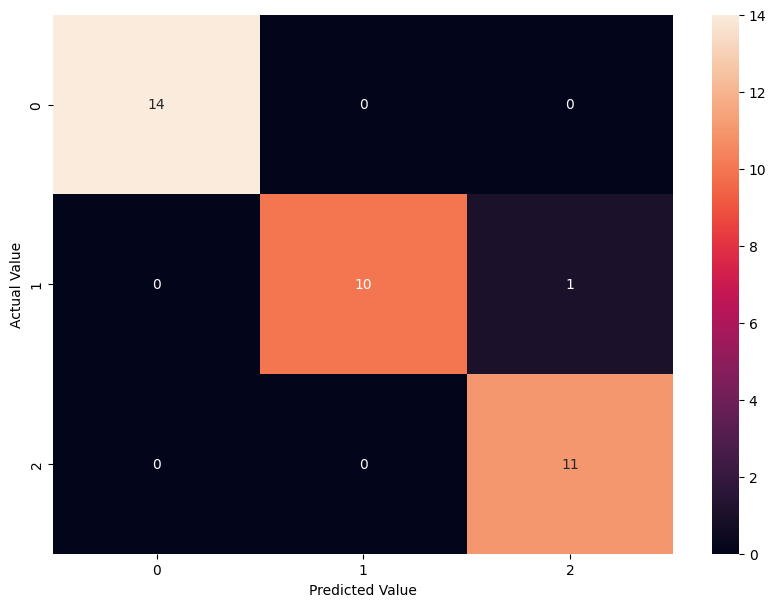

In [58]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [59]:
np.sum(y_test != predict)

1